In [23]:
from skimage.io import imread
from skimage.transform import resize
import glob, os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [33]:
dataset_path = 'dataset1' 

def load_dataset(dataset_path):
    imgs = []
    labels = []
    names = []
    for directory in glob.glob(os.path.join(dataset_path,"*")):
        print("Loading", directory)
        for file in tqdm(glob.glob(os.path.join(directory, '*.png'))):

            img = imread(file,as_gray=True)
            imgs.append(resize(img, (162,300), anti_aliasing=True))
            labels.append(os.path.split(directory)[1][0])
            names.append(os.path.split(directory)[1][1:])
    return np.array(imgs), np.array(labels), names


In [34]:
imgs, labels, names = load_dataset(dataset_path)

Loading dataset\0Normal


100%|██████████| 514/514 [00:04<00:00, 121.92it/s]


Loading dataset\1Doubtful


100%|██████████| 477/477 [00:03<00:00, 138.07it/s]


Loading dataset\2Mild


100%|██████████| 232/232 [00:01<00:00, 139.32it/s]


Loading dataset\3Moderate


100%|██████████| 221/221 [00:01<00:00, 125.04it/s]


Loading dataset\4Severe


100%|██████████| 206/206 [00:01<00:00, 126.90it/s]


Loading dataset\loader.py


0it [00:00, ?it/s]


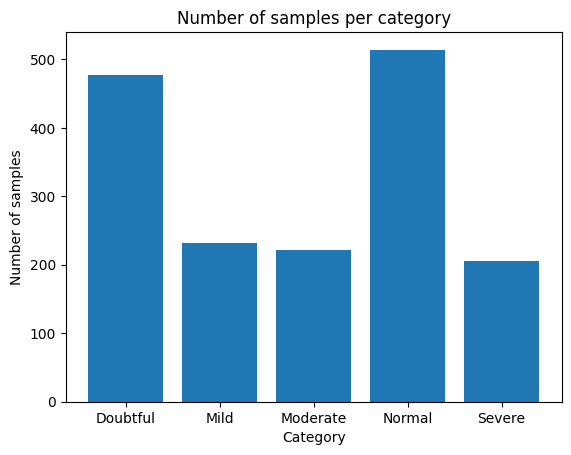

In [35]:
plt.figure()
height, label = np.unique(names, return_counts=True)

plt.bar(height, label)
plt.xlabel("Category")
plt.ylabel("Number of samples")
plt.title("Number of samples per category")
plt.show()


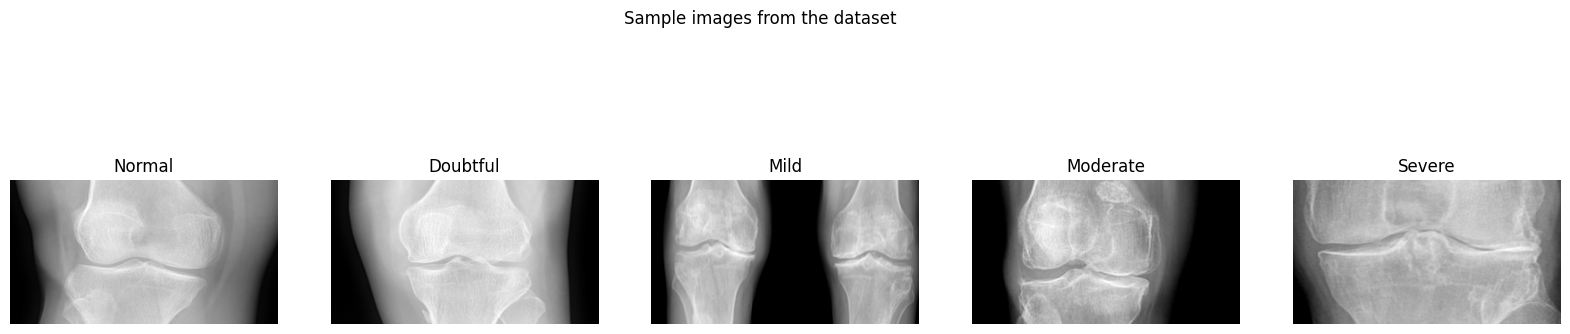

In [42]:
fig,ax = plt.subplots(1,5,figsize=(20,5))
indxs = [10,600,1100,1400,1649]
for i in range(len(indxs)):
    indx = indxs[i]
    ax[i].imshow(imgs[indx], cmap='gray')
    ax[i].set_title(names[indx])
    ax[i].axis('off')
fig.suptitle("Sample images from the dataset")
plt.show()